In [1]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./mushroom/mushroom_train.csv',header=None)

In [3]:
data[10] = data[10].apply(lambda x: 'b' if(x=='?') else x)

In [4]:
data[14].value_counts()

w    3505
p    1495
g     473
n     410
b     350
o     144
e      73
c      28
y      22
Name: 14, dtype: int64

In [5]:
training_data,training_label = data[ (list(range(10)) + list(range(11,15)) + list(range(16,22))) ].values,data[(22)].values.astype(np.int)
temp = training_data.copy()

In [6]:
name = [
     ['b','c','x','f','k','s'],
     ['f','g','y','s'],
     ['n','b','c','g','r','p','u','e','w','y'],
     ['t','f'],
     ['a','l','c','y','f','m','n','p','s'],
     ['a','d','f','n'],
     ['c','w','d'],
    ['b','n'],
    ['k','n','b','h','g','r','o','p','u','e','w','y'],
    ['e','t'],
    ['f','y','k','s'],
    ['f','y','k','s'],
    ['n','b','c','g','o','p','e','w','y'],
    ['n','b','c','g','o','p','e','w','y'],
    ['n','o','w','y'],
    ['n','o','t'],
    ['c','e','f','l','n','p','s','z'],
    ['k','n','b','h','r','o','u','w','y'],
    ['a','c','n','s','v','y'],
    ['g','l','m','p','u','w','d']]

mapping = {}
map_name = []
for i in range(len(name)):
    for t in name[i]:
        mapping['{0}_{1}'.format(i,t)] = len(mapping)
        map_name.append('{0}_{1}'.format(i,t))

In [7]:
temp = np.zeros((training_data.shape[0],len(mapping)))

for i in range(training_data.shape[0]):
    for j in range(training_data.shape[1]):
        idx = '{0}_{1}'.format(j,training_data[i][j])
        
        temp[i][mapping[idx]] = 1

In [8]:
temp.shape

(6500, 117)

In [9]:
def norm(x,y):
    mean = x.mean(axis=0)
    std = x.std(axis=0)+1e-8
    
    return (x-mean)/std,(y-mean)/std,mean,std

In [10]:
X_train, X_test, y_train, y_test = train_test_split(temp, training_label, test_size=0.2, random_state=42)

In [11]:
prior = [860/(860+764),764/(860+764)]

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=prior)
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("error rate {0}".format(1-(y_test != y_pred).sum()/y_test.shape[0] ))

error rate 0.9923076923076923


In [13]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(class_prior=prior)
y_pred = mnb.fit(X_train, y_train).predict(X_test)
print("error rate {0}".format(1-(y_test != y_pred).sum()/y_test.shape[0] ))



error rate 0.9615384615384616


In [14]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB(class_prior=prior)
y_pred = cnb.fit(X_train, y_train).predict(X_test)
print("error rate {0}".format(1-(y_test != y_pred).sum()/y_test.shape[0] ))



error rate 0.96


In [15]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(class_prior=prior)
y_pred = bnb.fit(X_train, y_train).predict(X_test)
print("error rate {0}".format(1-(y_test != y_pred).sum()/y_test.shape[0] ))



error rate 0.9461538461538461


In [16]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
t = DecisionTreeClassifier(criterion='gini', max_depth=80, min_samples_split=10,
                                  min_samples_leaf =6,min_weight_fraction_leaf=0.0, 
                                  random_state=None, max_leaf_nodes=200,class_weight=None)

y_pred = t.fit(X_train, y_train).predict(X_train)
print("error rate {0}".format(1-(y_train != y_pred).sum()/y_pred.shape[0] ))
y_pred = t.fit(X_train, y_train).predict(X_test)
print("error rate {0}".format(1-(y_test != y_pred).sum()/y_test.shape[0] ))

error rate 1.0
error rate 1.0


In [25]:
import os
os.environ['PATH'] +=  (';C:\\Users\\seasa\\Anaconda3\\envs\\pytorch\\Library\\bin\\graphviz')
 


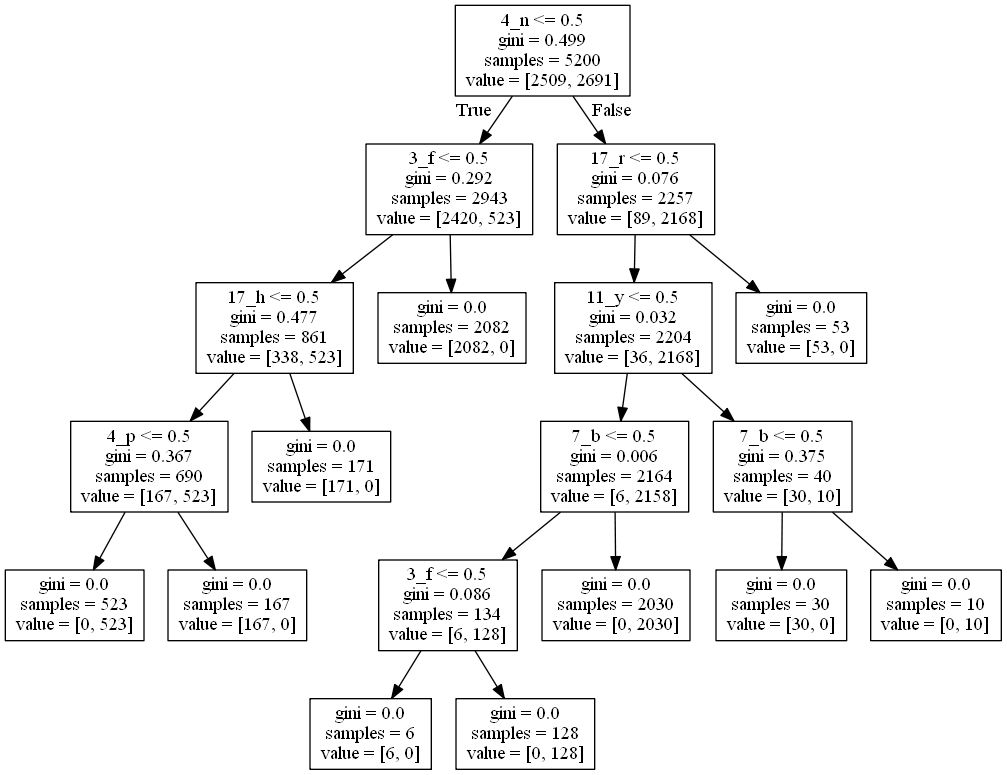

In [26]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_data = StringIO() 
export_graphviz(t,out_file=dot_data,feature_names=map_name)
Image(graph.create_png())

In [21]:
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion='gini', max_depth=80, min_samples_split=20,
                                  min_samples_leaf =20,min_weight_fraction_leaf=0.0, 
                                  random_state=None, max_leaf_nodes=200,class_weight=None)

y_pred = t.fit(X_train, y_train).predict(X_train)
print("error rate {0}".format(1-(y_train != y_pred).sum()/y_pred.shape[0] ))
y_pred = t.fit(X_train, y_train).predict(X_test)
print("error rate {0}".format(1-(y_test != y_pred).sum()/y_test.shape[0] ))

error rate 0.9969230769230769
error rate 0.9984615384615385


In [19]:
X_train.shape

(5200, 117)

In [20]:
mapping

{'0_b': 0,
 '0_c': 1,
 '0_x': 2,
 '0_f': 3,
 '0_k': 4,
 '0_s': 5,
 '1_f': 6,
 '1_g': 7,
 '1_y': 8,
 '1_s': 9,
 '2_n': 10,
 '2_b': 11,
 '2_c': 12,
 '2_g': 13,
 '2_r': 14,
 '2_p': 15,
 '2_u': 16,
 '2_e': 17,
 '2_w': 18,
 '2_y': 19,
 '3_t': 20,
 '3_f': 21,
 '4_a': 22,
 '4_l': 23,
 '4_c': 24,
 '4_y': 25,
 '4_f': 26,
 '4_m': 27,
 '4_n': 28,
 '4_p': 29,
 '4_s': 30,
 '5_a': 31,
 '5_d': 32,
 '5_f': 33,
 '5_n': 34,
 '6_c': 35,
 '6_w': 36,
 '6_d': 37,
 '7_b': 38,
 '7_n': 39,
 '8_k': 40,
 '8_n': 41,
 '8_b': 42,
 '8_h': 43,
 '8_g': 44,
 '8_r': 45,
 '8_o': 46,
 '8_p': 47,
 '8_u': 48,
 '8_e': 49,
 '8_w': 50,
 '8_y': 51,
 '9_e': 52,
 '9_t': 53,
 '10_f': 54,
 '10_y': 55,
 '10_k': 56,
 '10_s': 57,
 '11_f': 58,
 '11_y': 59,
 '11_k': 60,
 '11_s': 61,
 '12_n': 62,
 '12_b': 63,
 '12_c': 64,
 '12_g': 65,
 '12_o': 66,
 '12_p': 67,
 '12_e': 68,
 '12_w': 69,
 '12_y': 70,
 '13_n': 71,
 '13_b': 72,
 '13_c': 73,
 '13_g': 74,
 '13_o': 75,
 '13_p': 76,
 '13_e': 77,
 '13_w': 78,
 '13_y': 79,
 '14_n': 80,
 '14_o': 81

In [22]:
data = pd.read_csv('./mushroom/mushroom_test.csv',header=None)
testing_data,testing_label = data[ ( list(range(10)) + list(range(11,15)) + list(range(16,22))) ].values,data[22].values.astype(np.int)


temp = np.zeros((testing_data.shape[0],X_train.shape[1]))
for i in range(testing_data.shape[0]):
    for j in range(testing_data.shape[1]):
        now = '{0}_{1}'.format(j,testing_data[i][j])
        temp[i][mapping[now]] = 1
        

In [23]:
testing_label.shape

(1624,)

In [25]:
testing_data = temp.copy()

In [26]:
y_pred = t.predict(testing_data)
print("error rate {0}".format((testing_label == y_pred).sum()/testing_label.shdape[0] ))

error rate 0.9963054187192119


In [27]:
y_pred = gnb.predict(testing_data)
print("error rate {0}".format(1-(testing_label != y_pred).sum()/testing_label.shape[0] ))

y_pred = mnb.predict(testing_data)
print("error rate {0}".format(1-(testing_label != y_pred).sum()/testing_label.shape[0] ))

y_pred = cnb.predict(testing_data)
print("error rate {0}".format(1-(testing_label != y_pred).sum()/testing_label.shape[0] ))

y_pred = bnb.predict(testing_data)
print("error rate {0}".format(1-(testing_label != y_pred).sum()/testing_label.shape[0] ))

error rate 0.9895320197044335
error rate 0.9575123152709359
error rate 0.9568965517241379
error rate 0.9464285714285714
